# Eigenvalue Placement and Stability

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from numpy import linalg as LA
%matplotlib inline

#### (d)  Evolution of states due to control
Here, we set the the values of the state transition matrices and assign the Gaussian error. You can use different kinds of error and check if it changes the behavior of the norm. Take the input $u[t]$ to be equal to zero for this case. Finally, we'll evaluate the evolution of $\vec{x}[t]$ over time according to
$$\vec{x}[t+1] = A\vec{x}[t] + \vec{w}[t]$$

A eigenvalues:
 [-1.  2.]


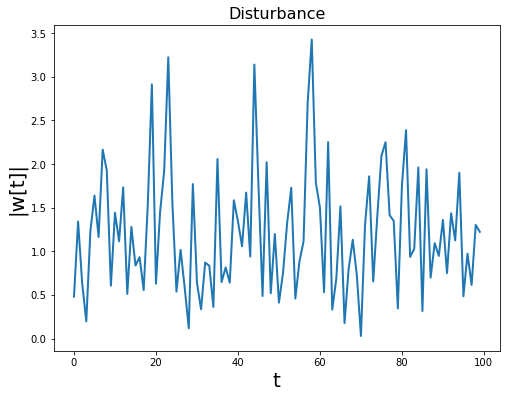

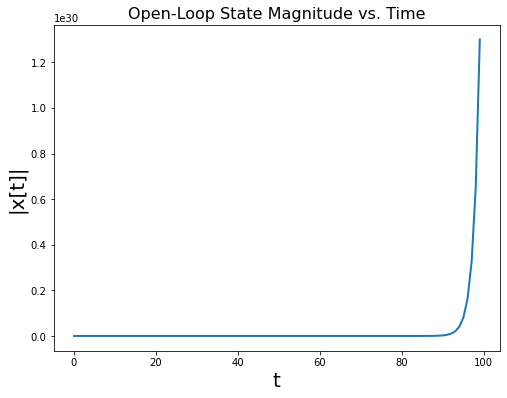

In [2]:
# Define system matrices
A = np.array([[-2, 2],[-2, 3]]) # 2 x 2 matrix.
b = np.array([[1], [1]]) # 2 x 1 matrix (note you could also represent this as a length 2 vector).
# Check the eigenvalue of matrix A. The eigenvalues will determine if the system is stable or not.
print("A eigenvalues:\n", LA.eigvals(A)) 

# Number of time steps
t0 = 100

# Random disturbance input
# Create an list of length t0 whose entries are 2 x 1 matrices composed of random numbers 
# with a Gaussian distribution of mu = 0 and sigma = 1. 
mu, sigma = 0, 1 # define mean and standard deviation
w = np.random.normal(mu, sigma, (t0, 2, 1)) # Assign the disturbance

# Define initial state 
# BEGIN STUDENT: Assign the initial state of the matrix
x0 = np.array([[1], [1]]) # Student: Pick an initial state of the system. You can change it to see if the ouput changes. 2 x 1 matrix.
# END STUDENT

x = x0
normw = np.zeros(t0)
normx = np.zeros(t0)

# Finally, to complete (h) we evaluate the evolution of the state $\vec{x}[t]$ with time and 
# find the norm of the state $\vec{x}[t]$ and the error w[t] as a function of time

# BEGIN STUDENT: Compute the state evolution for the open loop system.
for t in range(t0):
    x = A @ x + w[t] # Student: Compute the state evolution $\vec{x}[t+1] = A\vec{x}[t] + w[t]$
    # Note: A @ x is another way to write np.dot(A, x), which ends up looking a lot cleaner in the end.
    normw[t] = LA.norm(w[t]) # Student: Calculate the norm of error at a given time
    normx[t] = LA.norm(x) # Student: Calculate the norm of the state at a given time
# END STUDENT

#Plotting the norm of w(t) and x(t)
plt.figure(figsize=(8, 6))
plt.plot(normw, linewidth=2)
plt.ylabel('|w[t]|', fontsize =20)
plt.xlabel('t', fontsize =20)
plt.title('Disturbance', fontsize=16)

plt.figure(figsize=(8, 6))
plt.plot(normx, linewidth=2)
plt.ylabel('|x[t]|', fontsize =20)
plt.xlabel('t', fontsize =20)
plt.title('Open-Loop State Magnitude vs. Time', fontsize=16)

plt.show()

#### (e) Feedback to stablize the system
Now we will add feedback to the system. Assign the matrix $\vec{f} = [f_1, f_2]$ calculated in part (c) of the problem to check if the state becomes bounded over time. Then we'll calculate the new state evolution as a function of time and check if the norm changes.

A_cl:
 [[-0.25 -0.75]
 [-0.25  0.25]]
A_cl eigenvalues:
 [-0.5  0.5]


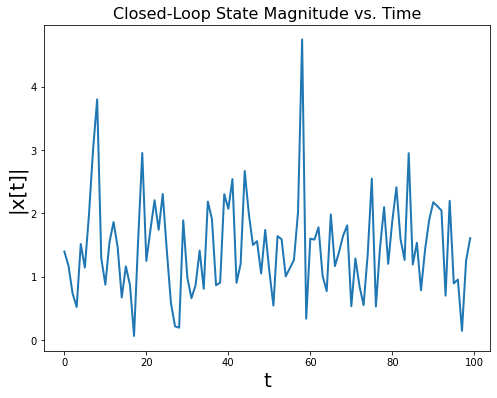

In [3]:
#BEGIN STUDENT: Assign a feedback constants f = [f1 f2] and calculate the closed loop state transition matrix A_cl.
f = np.array([[7/4, -11/4]]) # Student: Assign the value of f = [f1 f2]. 1 x 2 matrix.
A_cl = A + np.dot(b, f) # Student: Assign A_cl = A + bf. 2 x 2 matrix.
#END STUDENT
print("A_cl:\n", A_cl)
print("A_cl eigenvalues:\n", LA.eigvals(A_cl))

# Here we calculate the evolution of state $\vec{x}[t] for the system with feedback
x = x0
normf = np.zeros(t0)

# BEGIN STUDENT: Compute the state evolution for the closed loop system.
# This should look very similar to the state evolution for the open loop system.
for t in range(t0):
    x = A_cl @ x + w[t] # Compute the state evolution $\vec{x}[t+1] = A_cl\vec{x}[t] + w[t]$
    # Note: A @ x is another way to write np.dot(A, x), which ends up looking a lot cleaner in the end.
    normf[t] = LA.norm(x) # Compute norm of x
# END STUDENT

# Finally, we plot the state evolution of the system with feedback, to see that it no longer diverges
plt.figure(figsize=(8, 6))
plt.plot(normf, linewidth=2) 
plt.ylabel('|x[t]|', fontsize =20)
plt.xlabel('t', fontsize=20)
plt.title('Closed-Loop State Magnitude vs. Time', fontsize=16)
plt.show()